In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

## Helper Functions

In [2]:
def load_df(source, specific_string='', verbose=False):
    """
        Returns a list of dataframe that are loaded
        from the local directory based on search parameters.
        --------
    """

    res = [file for file in glob.glob("./Data/*.pkl")
           if source in file
           and specific_string in file
           and "full" in file]

    if verbose:
        print([print(file)
               for file in glob.glob("./Data/*.pkl")
               if source in file
               and "full" in file])

    return[pd.read_pickle(path) for path in res]


def multi_merge(input_list, how='outer', drop_na=True):
    """
        Returns a merged dataframe created from a list
        of dataframes.
        --------
    """

    output_df = reduce(lambda left, right:
                       pd.merge(left,
                                right,
                                left_index=True,
                                right_index=True,
                                how=how),
                       input_list)

    return(output_df.dropna() if drop_na else output_df)


def rename_columns(existing_col, new_labels):
    """
        Returns new column names based on existing ones
        crossed with user input labels.
        --------
    """
    new_cols = [[index+"_"+col for col in existing_col]
                for index in new_labels]

    return [val for sublist in new_cols for val in sublist]


def rescale_columns(df, scaler, col_param=[], round_pres=0):
    """
        Returns df with numerical columns scaled according
        to user specifications.

        col_param format:
        Data source = labels[0]
        Variable type = labels[1]
        --------
    """
    scaled_df = df.copy()

    # Consolidate all count columns to train MinMaxScaler
    columns = [col for col in scaled_df.columns
               if col_param[0] in col and col_param[1] in col]
    scale_train = pd.DataFrame(pd.concat([scaled_df[columns[0]],
                                          scaled_df[columns[1]],
                                          scaled_df[columns[2]],
                                          scaled_df[columns[3]]]))

    # Intialize Scaler and train on consolidated data
    scaler.fit(scale_train)

    # Apply trained scaler on all count columns and round
    scaled_df[columns] = scaler.transform(scaled_df[columns]).round(round_pres)

    return(scaled_df)


def corr_matrix(df, length, width):
    """
        Returns a correlation matrix based on user 
        specifications.
        --------
    """
    corr_matrix = df.corr()
    mask = np.array(corr_matrix)
    mask[np.tril_indices_from(mask)] = False
    fig, ax = plt.subplots(figsize=(width, length))
    sns.heatmap(corr_matrix,
                vmin=-1, vmax=1,
                cmap="RdBu_r",
                mask=mask,
                square=True,
                annot=True,
                linewidths=3,
                ax=ax)
    plt.show(fig)


def line_chart(df, labels, length=8, width=12):
    """
        Returns line chart based on given given data.

        Chart Format:
        X-axis = labels[0]
        Y-axis = labels[2]
        Hue = labels[1]
        --------
    """

    df_chart = df.stack().reset_index()
    df_chart.columns = labels

    plt.figure(figsize=(width, length))
    ax = sns.pointplot(x=labels[0], y=labels[2], hue=labels[1],
                       data=df_chart)
    plt.show()

In [3]:
col_names = ['ai', 'bdata', 'car', 'iot']

## Import Google Data

In [4]:
google_list = load_df("google", verbose=True)
google_list[0] = google_list[0].drop(['isPartial'], axis=1)
google_list[1] = google_list[1].drop(['isPartial'], axis=1)
google_list[0].columns = rename_columns(google_list[0].columns, ['google'])
google_list[1].columns = rename_columns(google_list[1].columns, ['google'])

google_list[0].head()

./Data/full_google_trends_analysis.pkl
./Data/full_google_weekly_trends_analysis.pkl
[None, None]


,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data
date,,,,
2018-09-01,2,32,46,32
2018-09-02,3,34,47,39
2018-09-03,2,41,76,52
2018-09-04,2,48,88,60
2018-09-05,3,48,89,61


In [5]:
google_list[1] = google_list[1].loc[google_list[1].index[
    google_list[1].index.month >= 7]]

google_list[1].to_pickle("./Data/google_weekly_data.pkl")
google_list[1].head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data
date,,,,
2018-07-01,2,43,83,57
2018-07-08,3,46,88,57
2018-07-15,2,47,88,62
2018-07-22,3,47,90,60
2018-07-29,3,48,93,59


### Visual Analysis

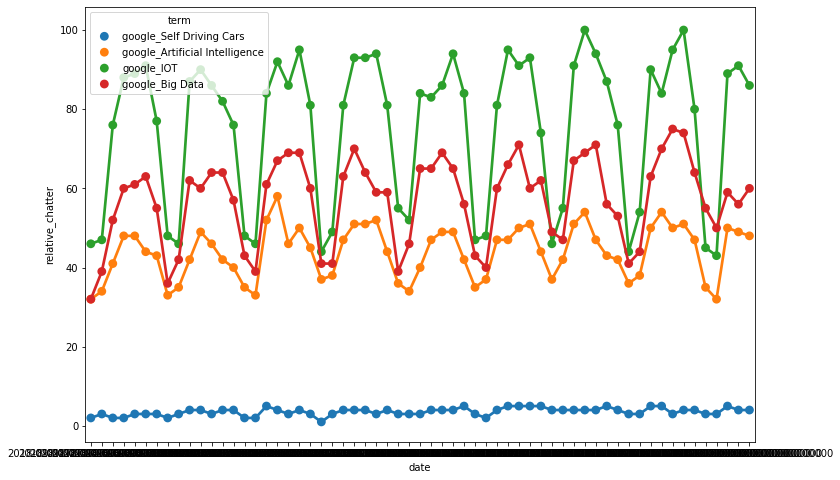

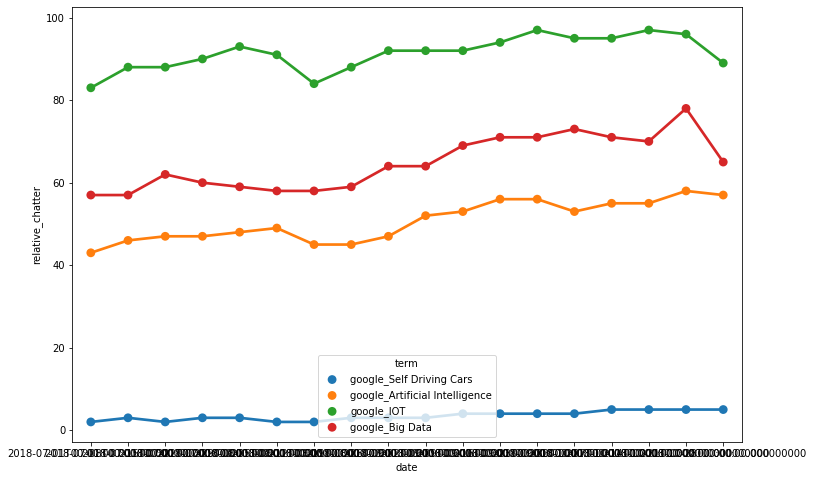

In [6]:
for x in google_list:
    line_chart(x, ['date', 'term', 'relative_chatter'])

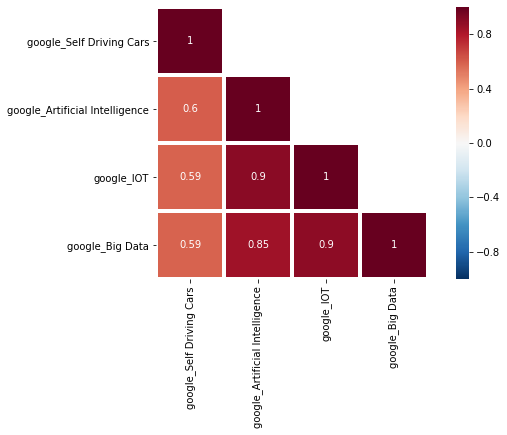

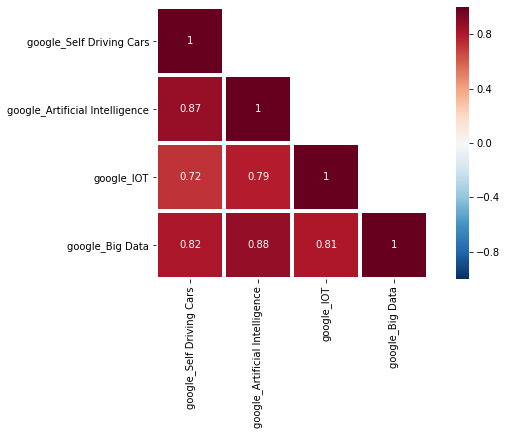

In [7]:
for x in google_list:
    corr_matrix(x, length=5, width=10)

## Import Reddit Data

In [8]:
reddit_list = load_df("reddit", verbose=True)
reddit_list[0].head()

./Data/reddit_full_Artificial Intelligence_1530417600.pkl
./Data/reddit_full_Artificial Intelligence_1530763200.pkl
./Data/reddit_full_Artificial Intelligence_1531713600.pkl
./Data/reddit_full_Artificial Intelligence_1532491200.pkl
./Data/reddit_full_Artificial Intelligence_1533441600.pkl
./Data/reddit_full_Artificial Intelligence_1534219200.pkl
./Data/reddit_full_Artificial Intelligence_1534996800.pkl
./Data/reddit_full_Artificial Intelligence_1535774400.pkl
./Data/reddit_full_Artificial Intelligence_1535860800.pkl
./Data/reddit_full_Artificial Intelligence_1536465600.pkl
./Data/reddit_full_Artificial Intelligence_1537070400.pkl
./Data/reddit_full_Artificial Intelligence_1537588800.pkl
./Data/reddit_full_Artificial Intelligence_1538366400.pkl
./Data/reddit_full_Artificial Intelligence_1539144000.pkl
./Data/reddit_full_Artificial Intelligence_1539748800.pkl
./Data/reddit_full_Artificial Intelligence_1540353600.pkl
./Data/reddit_full_Big Data_1530417600.pkl
./Data/reddit_full_Big Data_1

,compound,neg,neu,pos,count,unique_authors,posts_per_author
created_utc,,,,,,,
2018-07-01,0.407604,0.010837,0.789388,0.199816,49,40,1.225000
2018-07-02,0.274516,0.030922,0.783882,0.185183,153,91,1.681319
2018-07-03,0.334840,0.035772,0.719620,0.244620,92,72,1.277778
2018-07-04,0.346363,0.028645,0.738322,0.233025,121,94,1.287234
2018-07-05,0.413975,0.064750,0.674500,0.260250,4,3,1.333333


In [9]:
reddit_ai_list = load_df("reddit", "Artificial")
reddit_bdata_list = load_df("reddit", "Big Data")
reddit_iot_list = load_df("reddit", "IOT")
reddit_cars_list = load_df("reddit", "Cars")

temp_list = [pd.concat(reddit_ai_list), pd.concat(reddit_bdata_list),
             pd.concat(reddit_iot_list), pd.concat(reddit_cars_list)]

temp_list[0].head()

,compound,neg,neu,pos,count,unique_authors,posts_per_author
created_utc,,,,,,,
2018-07-01,0.407604,0.010837,0.789388,0.199816,49,40,1.225000
2018-07-02,0.274516,0.030922,0.783882,0.185183,153,91,1.681319
2018-07-03,0.334840,0.035772,0.719620,0.244620,92,72,1.277778
2018-07-04,0.346363,0.028645,0.738322,0.233025,121,94,1.287234
2018-07-05,0.413975,0.064750,0.674500,0.260250,4,3,1.333333


### Consolidate Reddit Data

In [10]:
# Sort by date and remove overlaps
final_temp_list = map(lambda x: x.loc[~x.index.duplicated(keep='first')],
                      map(lambda x: x.sort_index(), temp_list))

# Merges list of df's and renames columns
reddit_df = multi_merge(final_temp_list)
reddit_df.columns = rename_columns(reddit_list[0].columns,
                                   ['reddit'+'_'+s for s in col_names])

reddit_df.head()

,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,reddit_ai_posts_per_author,reddit_bdata_compound,reddit_bdata_neg,reddit_bdata_neu,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
created_utc,,,,,,,,,,,,,,,,,,,,,
2018-07-01,0.407604,0.010837,0.789388,0.199816,49,40,1.225000,-0.006739,0.038704,0.921370,...,32,28,1.142857,0.247625,0.055750,0.849875,0.094375,8,6,1.333333
2018-07-02,0.274516,0.030922,0.783882,0.185183,153,91,1.681319,0.065626,0.027223,0.903183,...,67,54,1.240741,-0.069456,0.078812,0.865688,0.055500,16,14,1.142857
2018-07-03,0.334840,0.035772,0.719620,0.244620,92,72,1.277778,0.197668,0.012895,0.830105,...,72,54,1.333333,0.005352,0.052217,0.912174,0.035652,23,20,1.150000
2018-07-04,0.346363,0.028645,0.738322,0.233025,121,94,1.287234,0.152892,0.028992,0.859023,...,82,53,1.547170,0.207544,0.029222,0.818222,0.152556,9,9,1.000000
2018-07-05,0.413975,0.064750,0.674500,0.260250,4,3,1.333333,0.033422,0.042268,0.889315,...,67,54,1.240741,0.111081,0.053385,0.861462,0.085154,26,26,1.000000


### Convert to Weekly Format

In [11]:
weekly_reddit_df = reddit_df.copy()

# Set columns to be summed
sum_col = [col for feature in ['count'] for col in weekly_reddit_df.columns
           if feature in col]

# Set columns to be averaged
avg_list = ['compound', 'neg', 'neu', 'pos', 'per_author', 'unique_authors']
avg_col = [col for feature in avg_list for col in weekly_reddit_df.columns
           if feature in col]

# Final consolidated logic dictionary
logic = {col: ('sum' if col in sum_col else 'mean')
         for col in weekly_reddit_df.columns}

# Re-initialize index to datetime format to allow so we can use resample function
weekly_reddit_df.index = pd.to_datetime(weekly_reddit_df.index)
weekly_reddit_df = weekly_reddit_df.resample('W').apply(logic)

weekly_reddit_df.head()

,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,reddit_ai_posts_per_author,reddit_bdata_compound,reddit_bdata_neg,reddit_bdata_neu,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
created_utc,,,,,,,,,,,,,,,,,,,,,
2018-07-01,0.407604,0.010837,0.789388,0.199816,49,40.000000,1.225000,-0.006739,0.038704,0.921370,...,32,28.000000,1.142857,0.247625,0.055750,0.849875,0.094375,8,6.000000,1.333333
2018-07-08,0.334494,0.031728,0.747607,0.220588,613,63.571429,1.358992,0.095316,0.038030,0.863221,...,375,41.000000,1.254043,0.051780,0.055085,0.858881,0.086053,128,16.000000,1.128303
2018-07-15,0.336037,0.030136,0.746171,0.223694,683,73.857143,1.307808,0.065111,0.045208,0.865704,...,447,54.142857,1.162387,0.050286,0.060603,0.848389,0.090996,183,19.714286,1.320197
2018-07-22,0.311115,0.033535,0.746237,0.220219,664,68.142857,1.349113,0.115344,0.046296,0.836624,...,480,48.857143,1.416748,0.024231,0.055517,0.884480,0.060003,170,18.714286,1.264684
2018-07-29,0.334759,0.028571,0.749804,0.221626,550,60.857143,1.300961,0.151033,0.039066,0.817554,...,514,58.571429,1.244343,0.027215,0.029443,0.920855,0.049682,202,17.000000,1.548692


### Visual Analysis

#### Daily Analysis

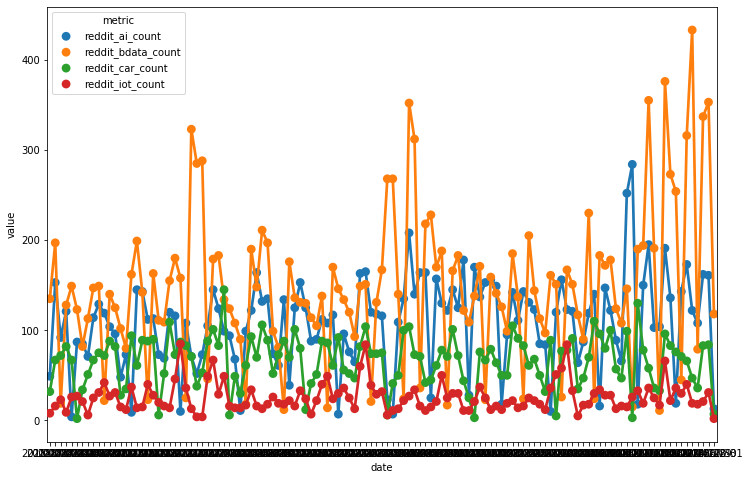

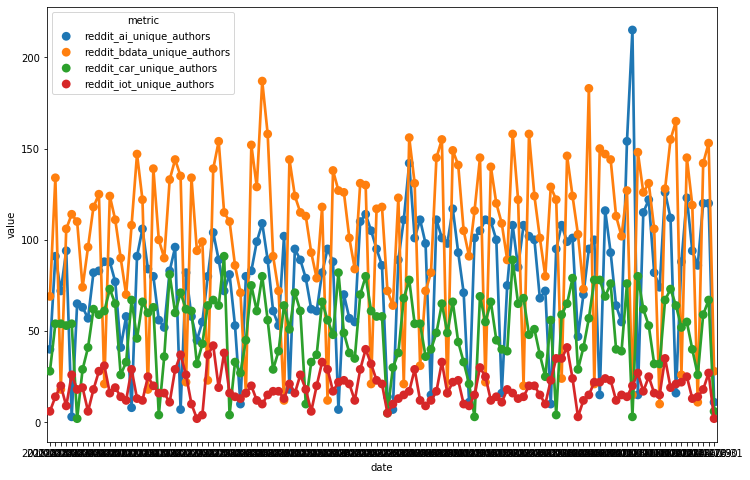

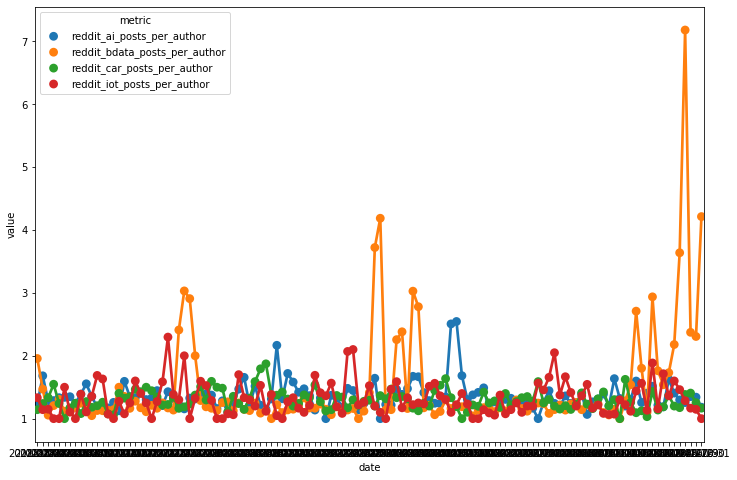

In [12]:
# feature_list = ['count', 'unique_authors', 'compound', 'neg', 'neu', 'pos']
feature_list = ['count', 'unique_authors', 'per_author']
column_list = [[col for col in reddit_df.columns if feature in col]
               for feature in feature_list]

for analysis_columns in column_list:
    line_chart(reddit_df[analysis_columns], ['date', 'metric', 'value'])

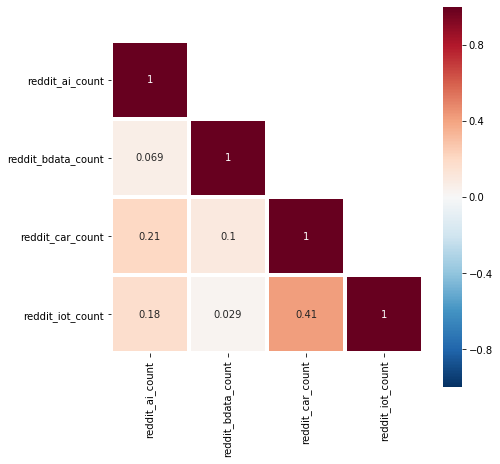

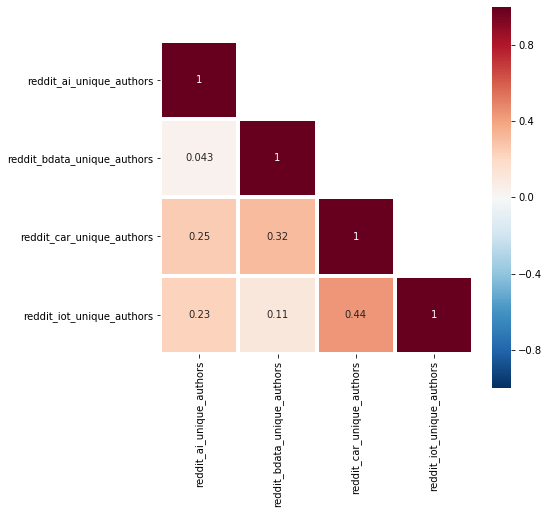

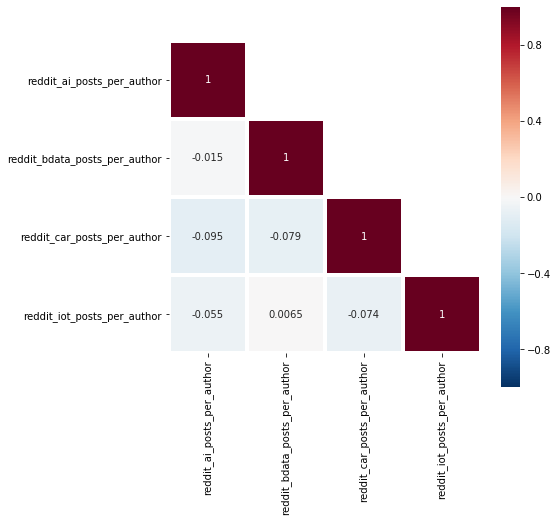

In [13]:
for analysis_columns in column_list:
    corr_matrix(reddit_df[analysis_columns], length=7, width=7)

#### Weekly Analysis

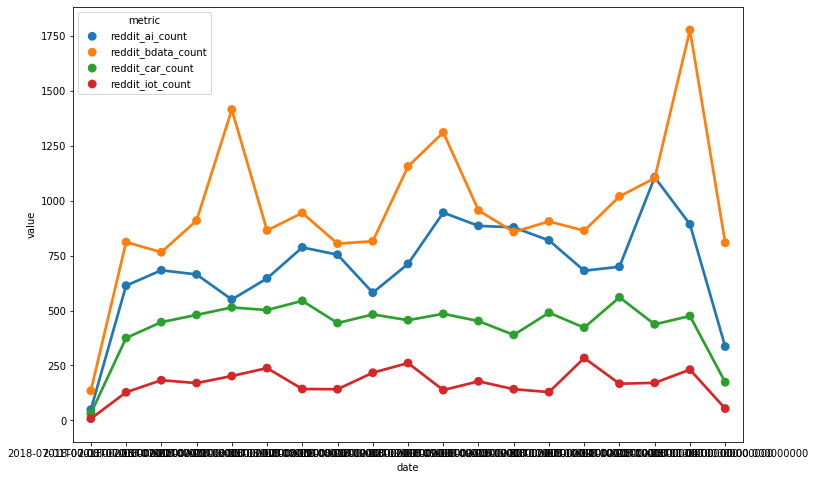

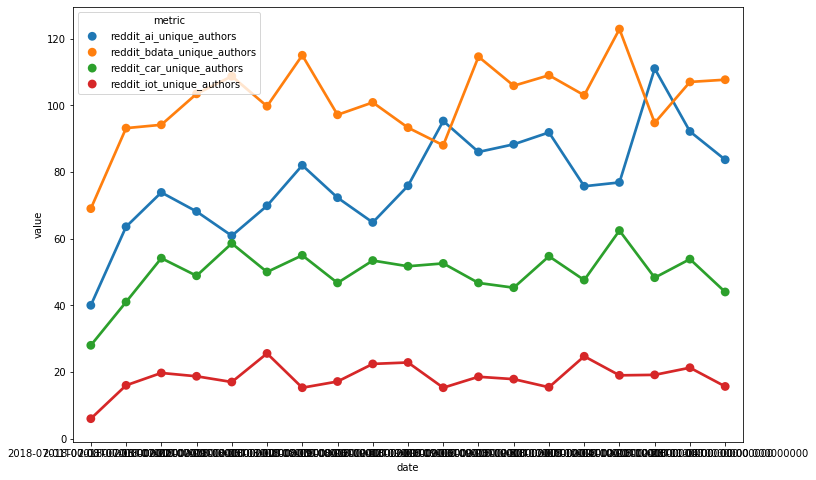

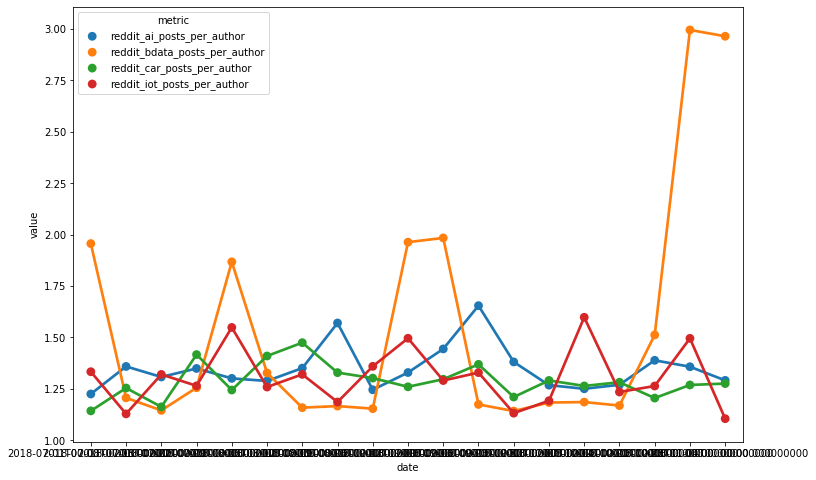

In [14]:
for analysis_columns in column_list:
    line_chart(weekly_reddit_df[analysis_columns], ['date', 'metric', 'value'])

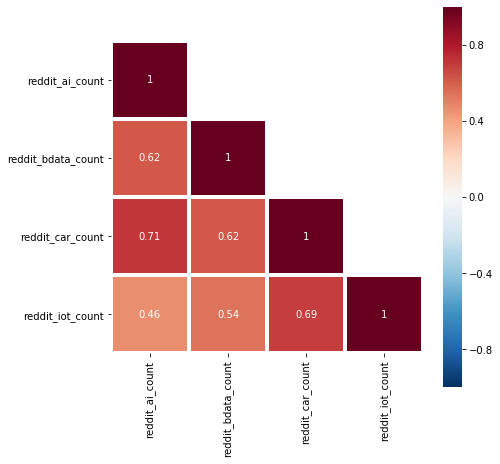

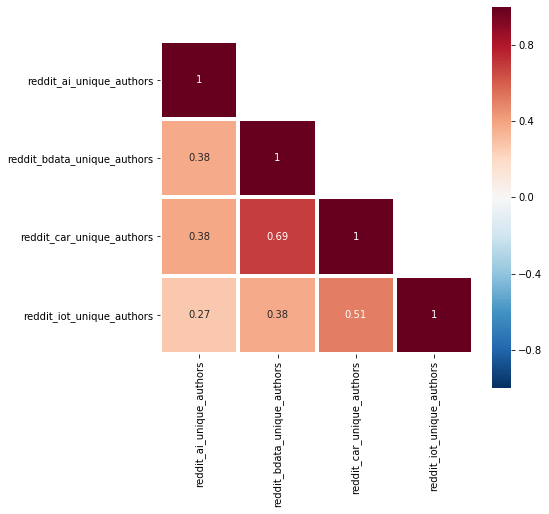

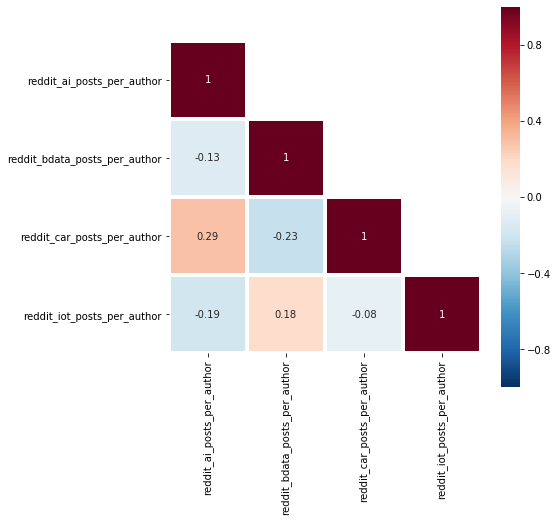

In [15]:
for analysis_columns in column_list:
    corr_matrix(weekly_reddit_df[analysis_columns], length=7, width=7)

## Import Twitter Data

In [16]:
twitter_list = load_df("twitter", verbose=True)
twitter_list[0]

./Data/twitter_full_Artificial Intelligence_2018-10-30.pkl
./Data/twitter_full_Artificial Intelligence_2018-10-31.pkl
./Data/twitter_full_Big Data_2018-10-30.pkl
./Data/twitter_full_Big Data_2018-10-31.pkl
./Data/twitter_full_IOT_2018-10-30.pkl
./Data/twitter_full_IOT_2018-10-31.pkl
./Data/twitter_full_Self Driving Cars_2018-10-30.pkl
./Data/twitter_full_Self Driving Cars_2018-10-31.pkl
[None, None, None, None, None, None, None, None]


,retweet_count,quote_count,reply_count,favorite_count,compound,neg,neu,pos,count
created_at,,,,,,,,,
2018-10-29,0.32,0.01,0.02,0.35,0.458308,0.01198,0.77981,0.20823,100


In [17]:
# Stack term df's that were paginated
temp_list = [pd.concat([twitter_list[index], twitter_list[index+1]])
             for index in range(0, len(twitter_list), 2)]

# Merges list of df's and renames columns
twitter_df = multi_merge(temp_list)
twitter_df.columns = rename_columns(twitter_list[0].columns,
                                    ['twitter'+'_'+s for s in col_names])

twitter_df.head()

,twitter_ai_retweet_count,twitter_ai_quote_count,twitter_ai_reply_count,twitter_ai_favorite_count,twitter_ai_compound,twitter_ai_neg,twitter_ai_neu,twitter_ai_pos,twitter_ai_count,twitter_bdata_retweet_count,...,twitter_car_count,twitter_iot_retweet_count,twitter_iot_quote_count,twitter_iot_reply_count,twitter_iot_favorite_count,twitter_iot_compound,twitter_iot_neg,twitter_iot_neu,twitter_iot_pos,twitter_iot_count
created_at,,,,,,,,,,,,,,,,,,,,,
2018-10-29,0.32,0.01,0.02,0.35,0.458308,0.01198,0.77981,0.20823,100,0.16,...,100,0.30,0.00,0.09,0.63,0.084989,0.05725,0.85688,0.08591,100
2018-10-30,0.08,0.00,0.05,0.31,0.348211,0.01555,0.81064,0.17381,100,1.17,...,100,0.53,0.09,0.11,1.13,0.290748,0.01478,0.84706,0.13816,100


## Combine All Data Sources

In [18]:
final_list = [google_list[0], reddit_df, twitter_df]
final_df = multi_merge(final_list)
final_df = final_df.loc[~final_df.index.duplicated(keep='first')]

final_df

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,twitter_car_count,twitter_iot_retweet_count,twitter_iot_quote_count,twitter_iot_reply_count,twitter_iot_favorite_count,twitter_iot_compound,twitter_iot_neg,twitter_iot_neu,twitter_iot_pos,twitter_iot_count
2018-10-29,5.0,50.0,89.0,59.0,0.332963,0.057296,0.680198,0.256265,162,120,...,100.0,0.30,0.00,0.09,0.63,0.084989,0.05725,0.85688,0.08591,100.0
2018-10-30,4.0,49.0,91.0,56.0,0.298286,0.026745,0.761677,0.211596,161,120,...,100.0,0.53,0.09,0.11,1.13,0.290748,0.01478,0.84706,0.13816,100.0


## Exploratory Analysis

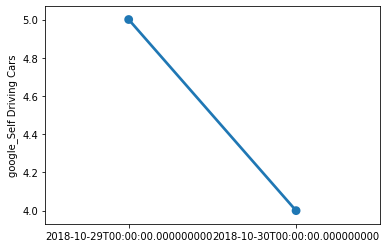

In [19]:
sns.pointplot(x=final_df.index, y=final_df["google_Self Driving Cars"], data=final_df, join=True)
# ax2.set(xlabel='Hour Of The Day', ylabel='Avearage # of bikers',title="Average Users Count By Hour Of The Day Across Season",label='big')

In [20]:
final_list = [google_list[0], reddit_df]
final_df = multi_merge(final_list)
final_df = final_df.loc[~final_df.index.duplicated(keep='first')]

final_df.head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
2018-09-01,2.0,32.0,46.0,32.0,0.392174,0.022913,0.739652,0.237435,23,14,...,6,5,1.200000,-0.109950,0.036833,0.963167,0.000000,6,5,1.200000
2018-09-02,3.0,34.0,47.0,39.0,0.392014,0.007714,0.724857,0.267429,7,7,...,41,30,1.366667,-0.070582,0.092545,0.831909,0.075545,11,10,1.100000
2018-09-03,2.0,41.0,76.0,52.0,0.285135,0.033459,0.762018,0.204523,109,89,...,50,38,1.315789,0.194154,0.008769,0.874231,0.117077,13,13,1.000000
2018-09-04,2.0,48.0,88.0,60.0,0.378629,0.032289,0.724963,0.242770,135,111,...,100,68,1.470588,-0.004127,0.070455,0.876318,0.053227,22,15,1.466667
2018-09-05,3.0,48.0,89.0,61.0,0.399452,0.024226,0.748197,0.227587,208,142,...,104,78,1.333333,0.149352,0.062778,0.836481,0.100741,27,17,1.588235


In [21]:
final_weekly_list = [google_list[1], weekly_reddit_df]
final_weekly_df = multi_merge(final_weekly_list)
final_weekly_df = final_weekly_df.loc[~final_weekly_df.index.duplicated(keep='first')]

final_weekly_df.head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
2018-07-01,2.0,43.0,83.0,57.0,0.407604,0.010837,0.789388,0.199816,49,40.000000,...,32,28.000000,1.142857,0.247625,0.055750,0.849875,0.094375,8,6.000000,1.333333
2018-07-08,3.0,46.0,88.0,57.0,0.334494,0.031728,0.747607,0.220588,613,63.571429,...,375,41.000000,1.254043,0.051780,0.055085,0.858881,0.086053,128,16.000000,1.128303
2018-07-15,2.0,47.0,88.0,62.0,0.336037,0.030136,0.746171,0.223694,683,73.857143,...,447,54.142857,1.162387,0.050286,0.060603,0.848389,0.090996,183,19.714286,1.320197
2018-07-22,3.0,47.0,90.0,60.0,0.311115,0.033535,0.746237,0.220219,664,68.142857,...,480,48.857143,1.416748,0.024231,0.055517,0.884480,0.060003,170,18.714286,1.264684
2018-07-29,3.0,48.0,93.0,59.0,0.334759,0.028571,0.749804,0.221626,550,60.857143,...,514,58.571429,1.244343,0.027215,0.029443,0.920855,0.049682,202,17.000000,1.548692


In [22]:
# Rescale Counts
scaler = MinMaxScaler(feature_range=(0, 100))
col_param = ['reddit', 'count']

scaled_daily_df = rescale_columns(final_df, scaler, col_param)
scaled_weekly_df = rescale_columns(final_weekly_df, scaler, col_param)

scaled_daily_df.head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
2018-09-01,2.0,32.0,46.0,32.0,0.392174,0.022913,0.739652,0.237435,5.0,14,...,1.0,5,1.200000,-0.109950,0.036833,0.963167,0.000000,1.0,5,1.200000
2018-09-02,3.0,34.0,47.0,39.0,0.392014,0.007714,0.724857,0.267429,1.0,7,...,9.0,30,1.366667,-0.070582,0.092545,0.831909,0.075545,2.0,10,1.100000
2018-09-03,2.0,41.0,76.0,52.0,0.285135,0.033459,0.762018,0.204523,25.0,89,...,11.0,38,1.315789,0.194154,0.008769,0.874231,0.117077,3.0,13,1.000000
2018-09-04,2.0,48.0,88.0,60.0,0.378629,0.032289,0.724963,0.242770,31.0,111,...,23.0,68,1.470588,-0.004127,0.070455,0.876318,0.053227,5.0,15,1.466667
2018-09-05,3.0,48.0,89.0,61.0,0.399452,0.024226,0.748197,0.227587,48.0,142,...,24.0,78,1.333333,0.149352,0.062778,0.836481,0.100741,6.0,17,1.588235


In [23]:
scaled_weekly_df.head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
2018-07-01,2.0,43.0,83.0,57.0,0.407604,0.010837,0.789388,0.199816,2.0,40.000000,...,1.0,28.000000,1.142857,0.247625,0.055750,0.849875,0.094375,0.0,6.000000,1.333333
2018-07-08,3.0,46.0,88.0,57.0,0.334494,0.031728,0.747607,0.220588,34.0,63.571429,...,21.0,41.000000,1.254043,0.051780,0.055085,0.858881,0.086053,7.0,16.000000,1.128303
2018-07-15,2.0,47.0,88.0,62.0,0.336037,0.030136,0.746171,0.223694,38.0,73.857143,...,25.0,54.142857,1.162387,0.050286,0.060603,0.848389,0.090996,10.0,19.714286,1.320197
2018-07-22,3.0,47.0,90.0,60.0,0.311115,0.033535,0.746237,0.220219,37.0,68.142857,...,27.0,48.857143,1.416748,0.024231,0.055517,0.884480,0.060003,9.0,18.714286,1.264684
2018-07-29,3.0,48.0,93.0,59.0,0.334759,0.028571,0.749804,0.221626,31.0,60.857143,...,29.0,58.571429,1.244343,0.027215,0.029443,0.920855,0.049682,11.0,17.000000,1.548692


In [24]:
# Rescale posts per author
col_param = ['reddit', 'per_author']
scaled_daily_df = rescale_columns(scaled_daily_df, scaler, col_param)
scaled_weekly_df = rescale_columns(scaled_weekly_df, scaler, col_param)

scaled_daily_df.to_pickle("./Data/agg_daily_data.pkl")
scaled_weekly_df.to_pickle("./Data/agg_weekly_data.pkl")
scaled_daily_df.head()

,google_Self Driving Cars,google_Artificial Intelligence,google_IOT,google_Big Data,reddit_ai_compound,reddit_ai_neg,reddit_ai_neu,reddit_ai_pos,reddit_ai_count,reddit_ai_unique_authors,...,reddit_car_count,reddit_car_unique_authors,reddit_car_posts_per_author,reddit_iot_compound,reddit_iot_neg,reddit_iot_neu,reddit_iot_pos,reddit_iot_count,reddit_iot_unique_authors,reddit_iot_posts_per_author
2018-09-01,2.0,32.0,46.0,32.0,0.392174,0.022913,0.739652,0.237435,5.0,14,...,1.0,5,3.0,-0.109950,0.036833,0.963167,0.000000,1.0,5,3.0
2018-09-02,3.0,34.0,47.0,39.0,0.392014,0.007714,0.724857,0.267429,1.0,7,...,9.0,30,6.0,-0.070582,0.092545,0.831909,0.075545,2.0,10,2.0
2018-09-03,2.0,41.0,76.0,52.0,0.285135,0.033459,0.762018,0.204523,25.0,89,...,11.0,38,5.0,0.194154,0.008769,0.874231,0.117077,3.0,13,0.0
2018-09-04,2.0,48.0,88.0,60.0,0.378629,0.032289,0.724963,0.242770,31.0,111,...,23.0,68,8.0,-0.004127,0.070455,0.876318,0.053227,5.0,15,8.0
2018-09-05,3.0,48.0,89.0,61.0,0.399452,0.024226,0.748197,0.227587,48.0,142,...,24.0,78,5.0,0.149352,0.062778,0.836481,0.100741,6.0,17,10.0


### AI Analysis

#### Post Count Analysis

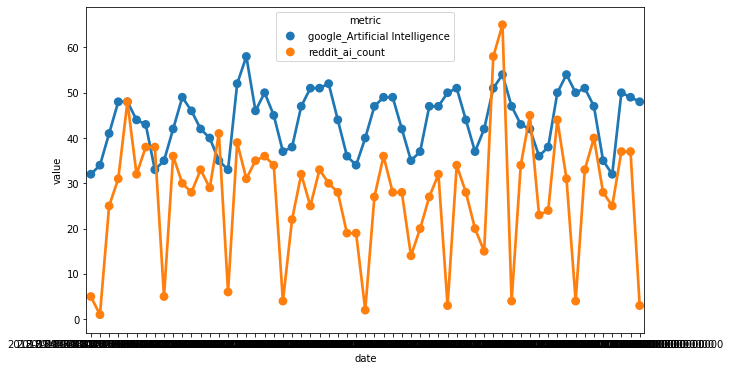

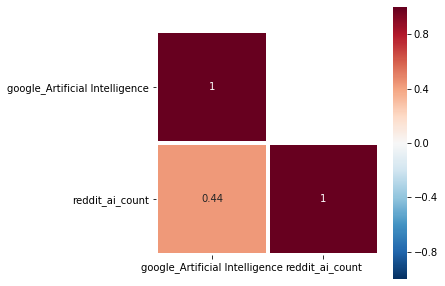

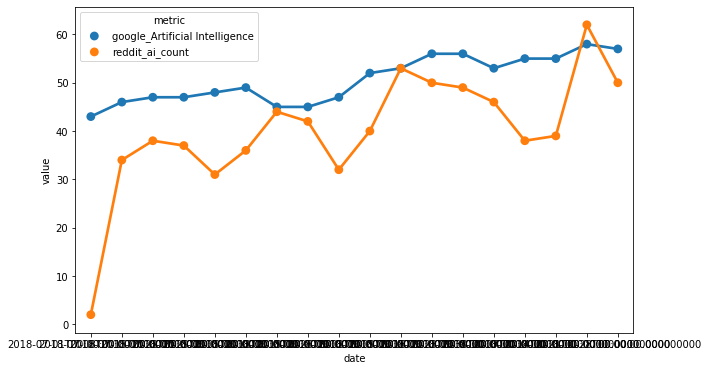

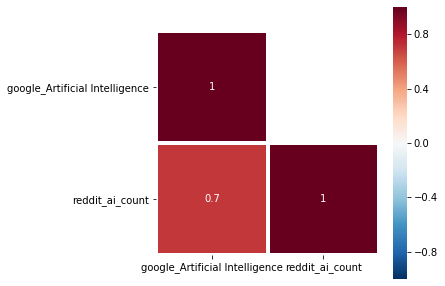

In [25]:
count_ai_columns = [col for col in scaled_daily_df.columns
                    if ('google' in col or 'count' in col) and
                    ('Artificial' in col or 'ai' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, count_ai_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[count_ai_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, count_ai_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[count_ai_columns], length=5, width=5)

#### Unique Author Analysis

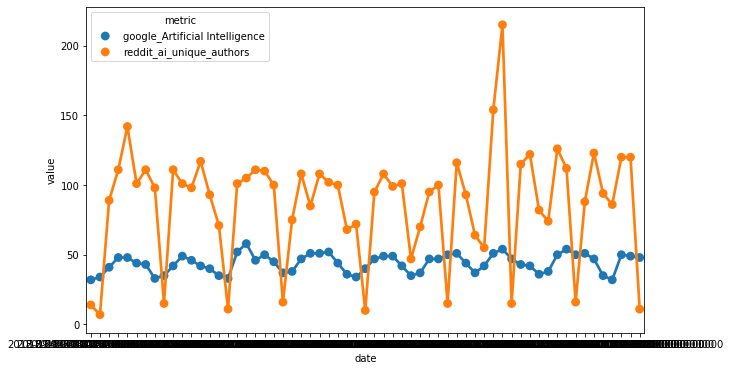

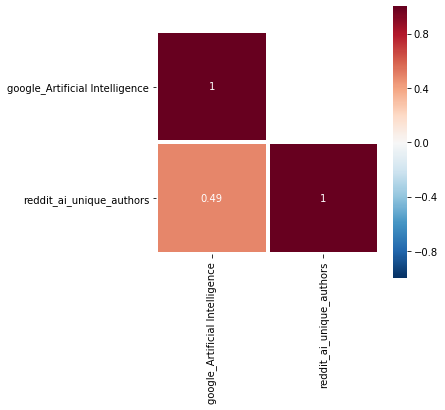

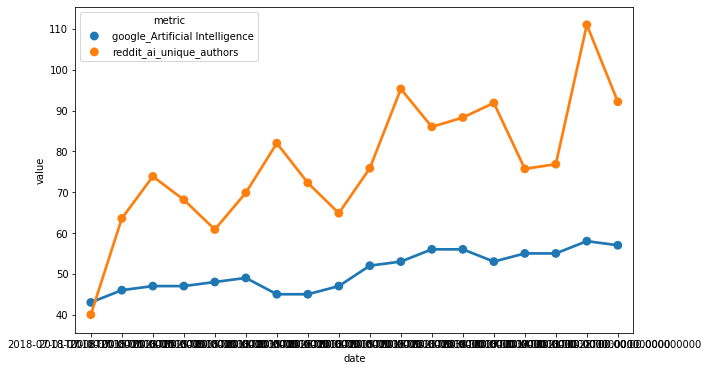

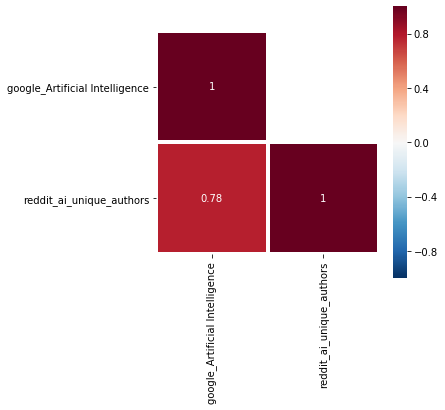

In [26]:
author_ai_columns = [col for col in scaled_daily_df.columns
                     if ('google' in col or 'unique_author' in col) and
                     ('Artificial' in col or 'ai' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, author_ai_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[author_ai_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, author_ai_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[author_ai_columns], length=5, width=5)

### Big Data Analysis

#### Post Count Analysis

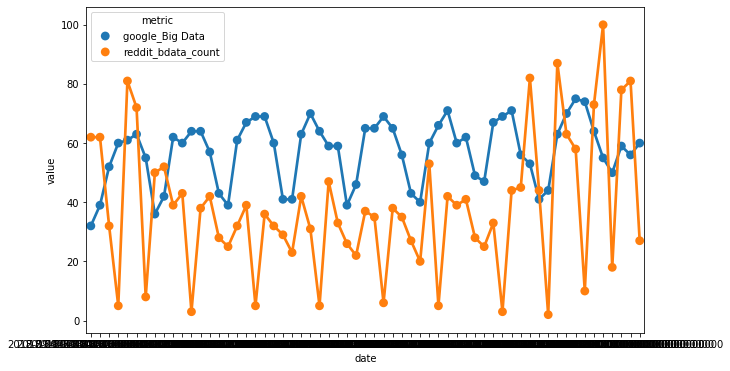

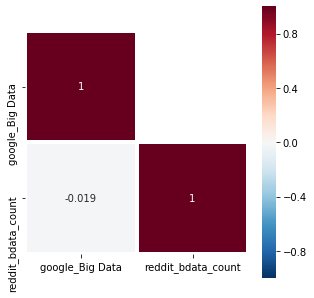

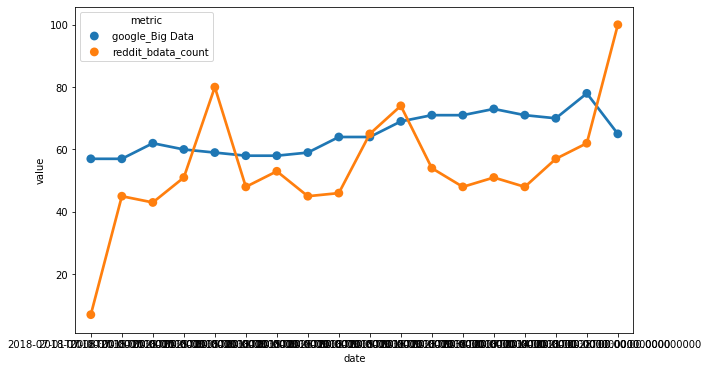

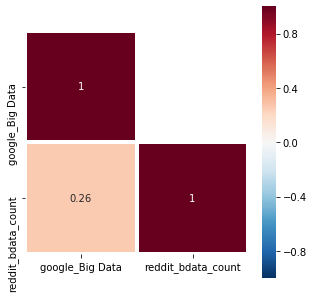

In [27]:
count_bd_columns = [col for col in scaled_daily_df.columns
                    if ('google' in col or 'count' in col) and
                    ('data' in col or 'Data' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, count_bd_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[count_bd_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, count_bd_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[count_bd_columns], length=5, width=5)

#### Unique Author Analysis

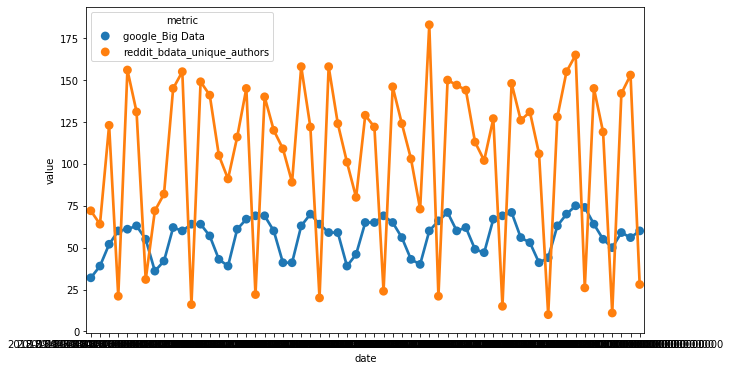

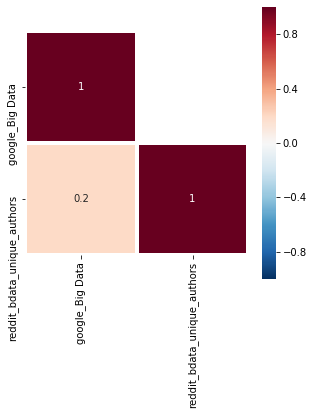

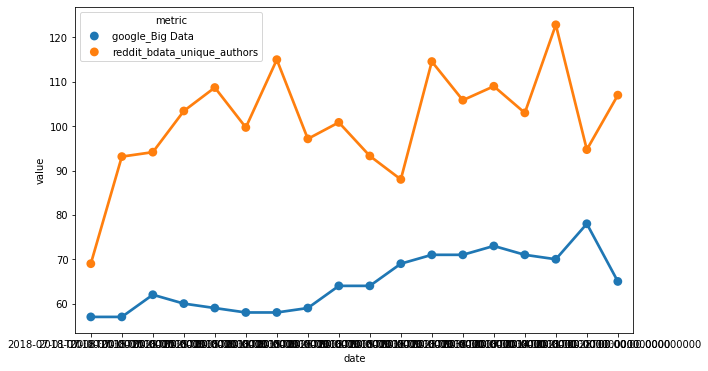

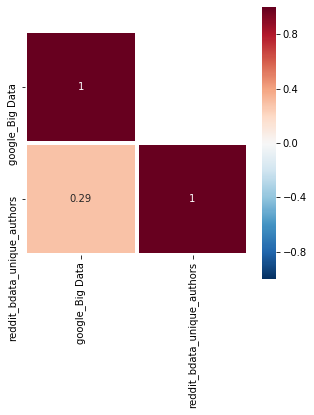

In [28]:
author_bd_columns = [col for col in scaled_daily_df.columns
                     if ('google' in col or 'unique_author' in col) and
                     ('data' in col or 'Data' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, author_bd_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[author_bd_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, author_bd_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[author_bd_columns], length=5, width=5)

### IoT Analysis

#### Post Count Analysis

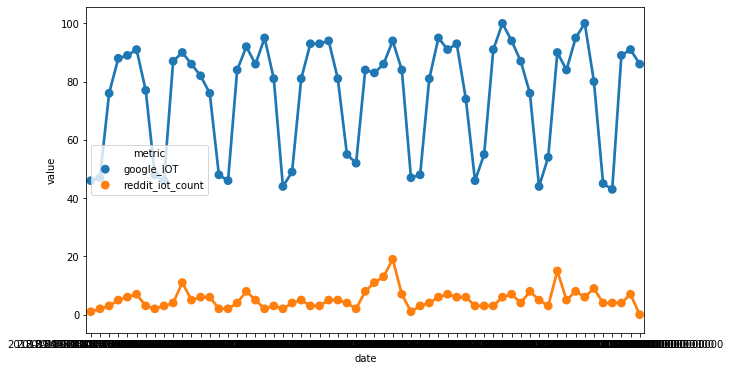

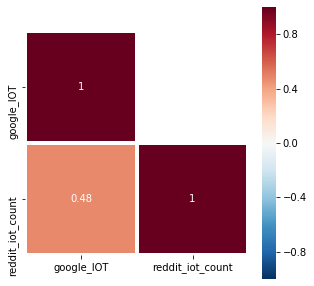

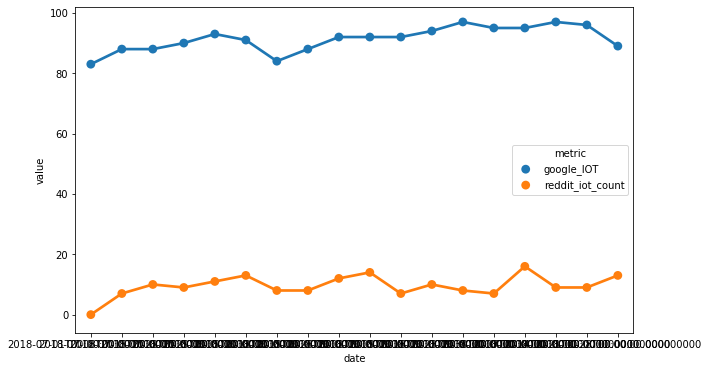

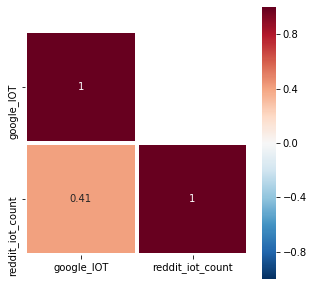

In [29]:
count_iot_columns = [col for col in scaled_daily_df.columns
                     if ('google' in col or 'count' in col) and
                     ('iot' in col or 'IOT' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, count_iot_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[count_iot_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, count_iot_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[count_iot_columns], length=5, width=5)

#### Unique Author Analysis

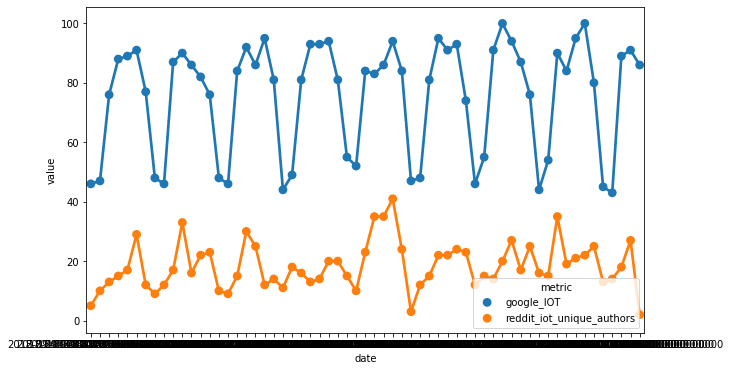

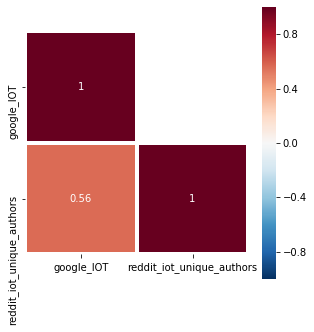

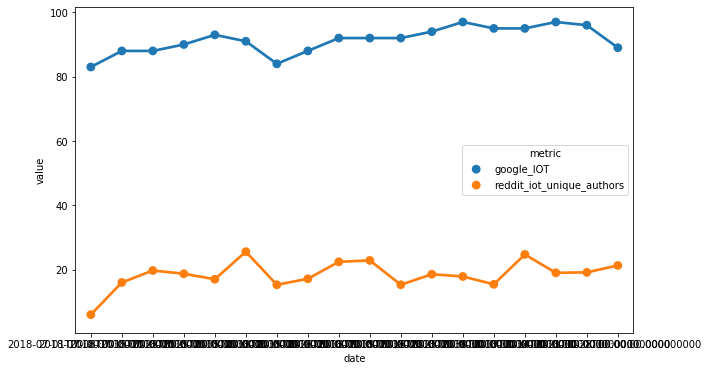

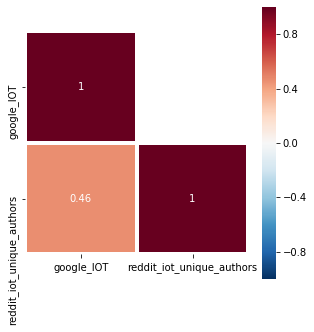

In [30]:
author_iot_columns = [col for col in scaled_daily_df.columns
                      if ('google' in col or 'unique_author' in col) and
                      ('iot' in col or 'IOT' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, author_iot_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[author_iot_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, author_iot_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[author_iot_columns], length=5, width=5)

### Self Driving Cars Analysis

#### Post Count Analysis

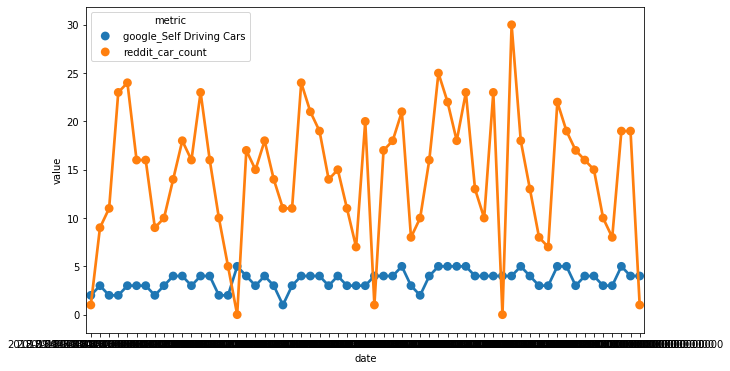

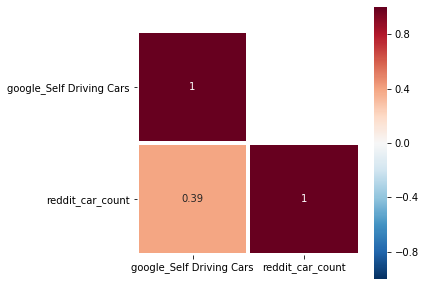

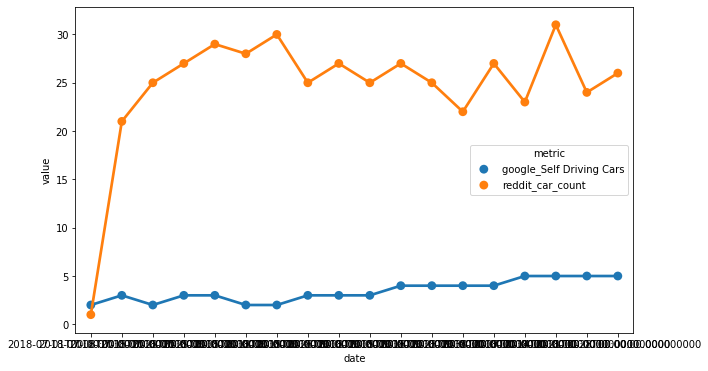

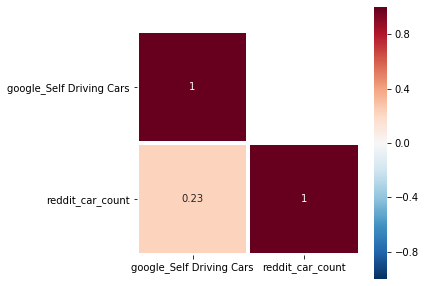

In [31]:
count_cars_columns = [col for col in scaled_daily_df.columns
                      if ('google' in col or 'count' in col)
                      and ('Cars' in col or 'car' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, count_cars_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[count_cars_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, count_cars_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[count_cars_columns], length=5, width=5)

#### Unique Author Analysis

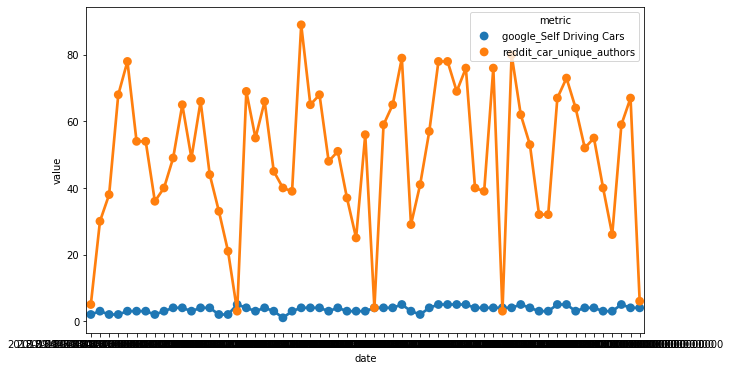

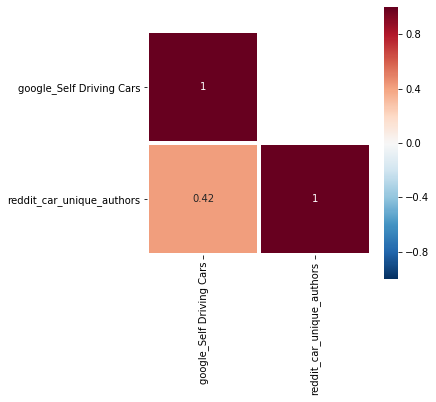

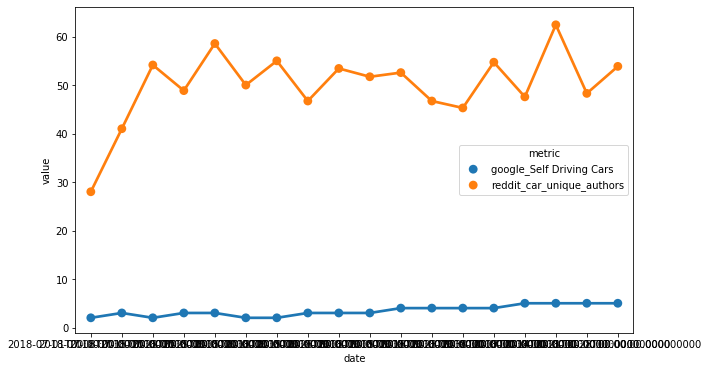

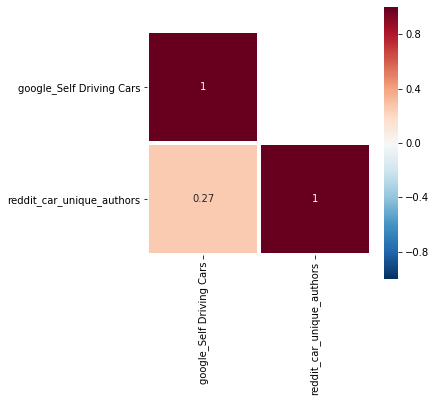

In [32]:
author_cars_columns = [col for col in scaled_daily_df.columns
                       if ('google' in col or 'unique_author' in col) and
                       ('Cars' in col or 'car' in col)]

# Daily Analysis
comparison_df_chart = scaled_daily_df.loc[:, author_cars_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_daily_df[author_cars_columns], length=5, width=5)

# Weekly Analysis
comparison_df_chart = scaled_weekly_df.loc[:, author_cars_columns]
line_chart(comparison_df_chart, ['date', 'metric', 'value'], length=6, width=10)
corr_matrix(scaled_weekly_df[author_cars_columns], length=5, width=5)

### Full Correlation Matrix

#### Post Count Daily Analysis

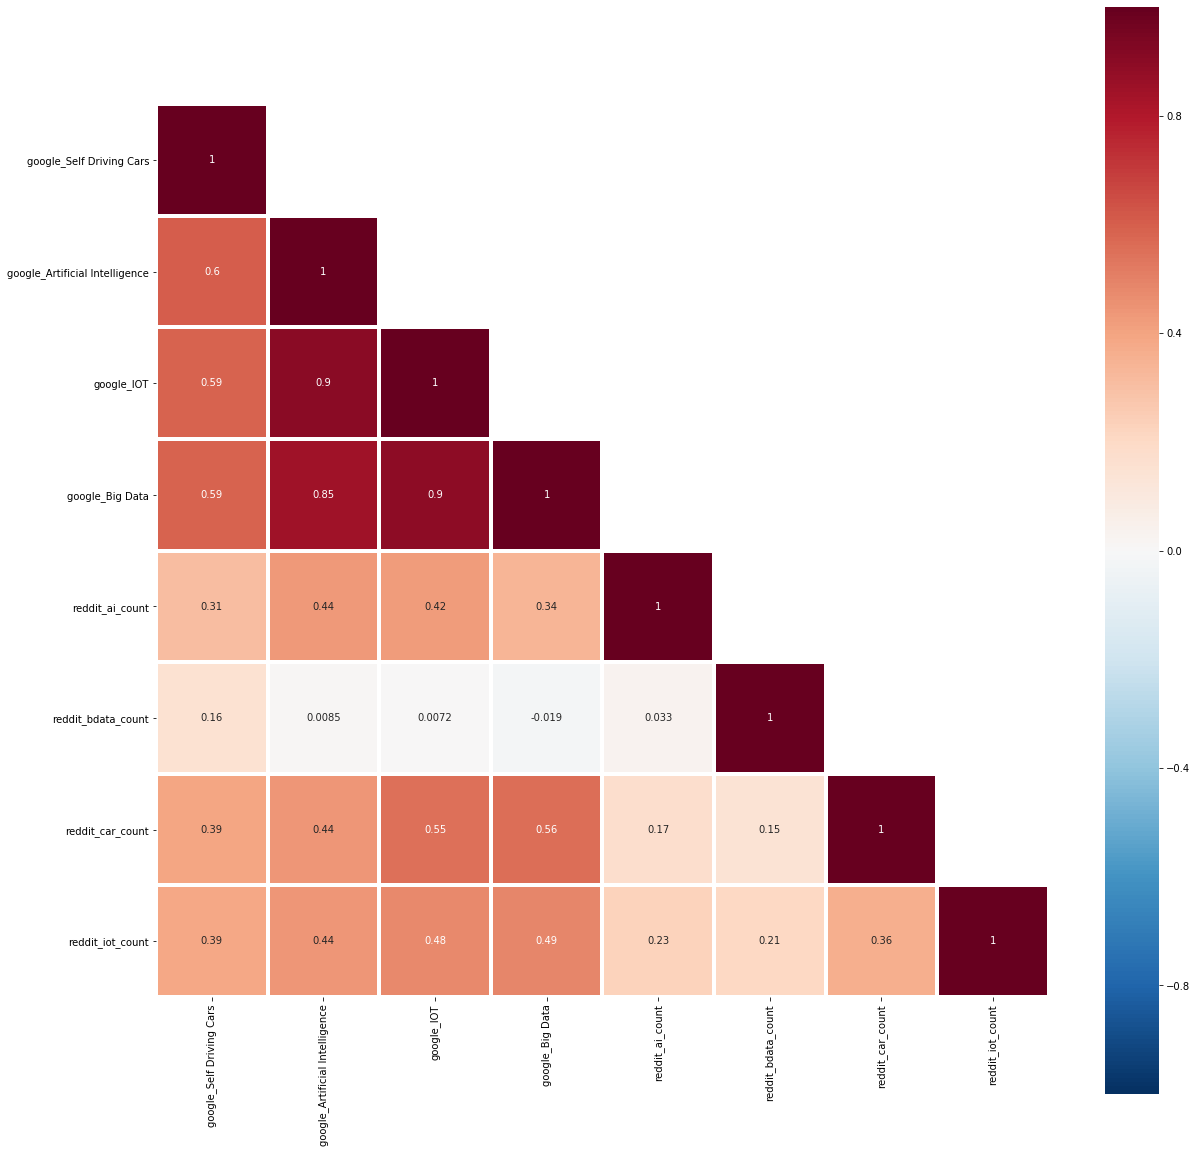

In [33]:
full_correl_columns = [col for col in scaled_daily_df.columns
                       if ('google' in col or 'count' in col)]

corr_matrix(scaled_daily_df[full_correl_columns], length=20, width=20)

#### Post Count Weekly Analysis

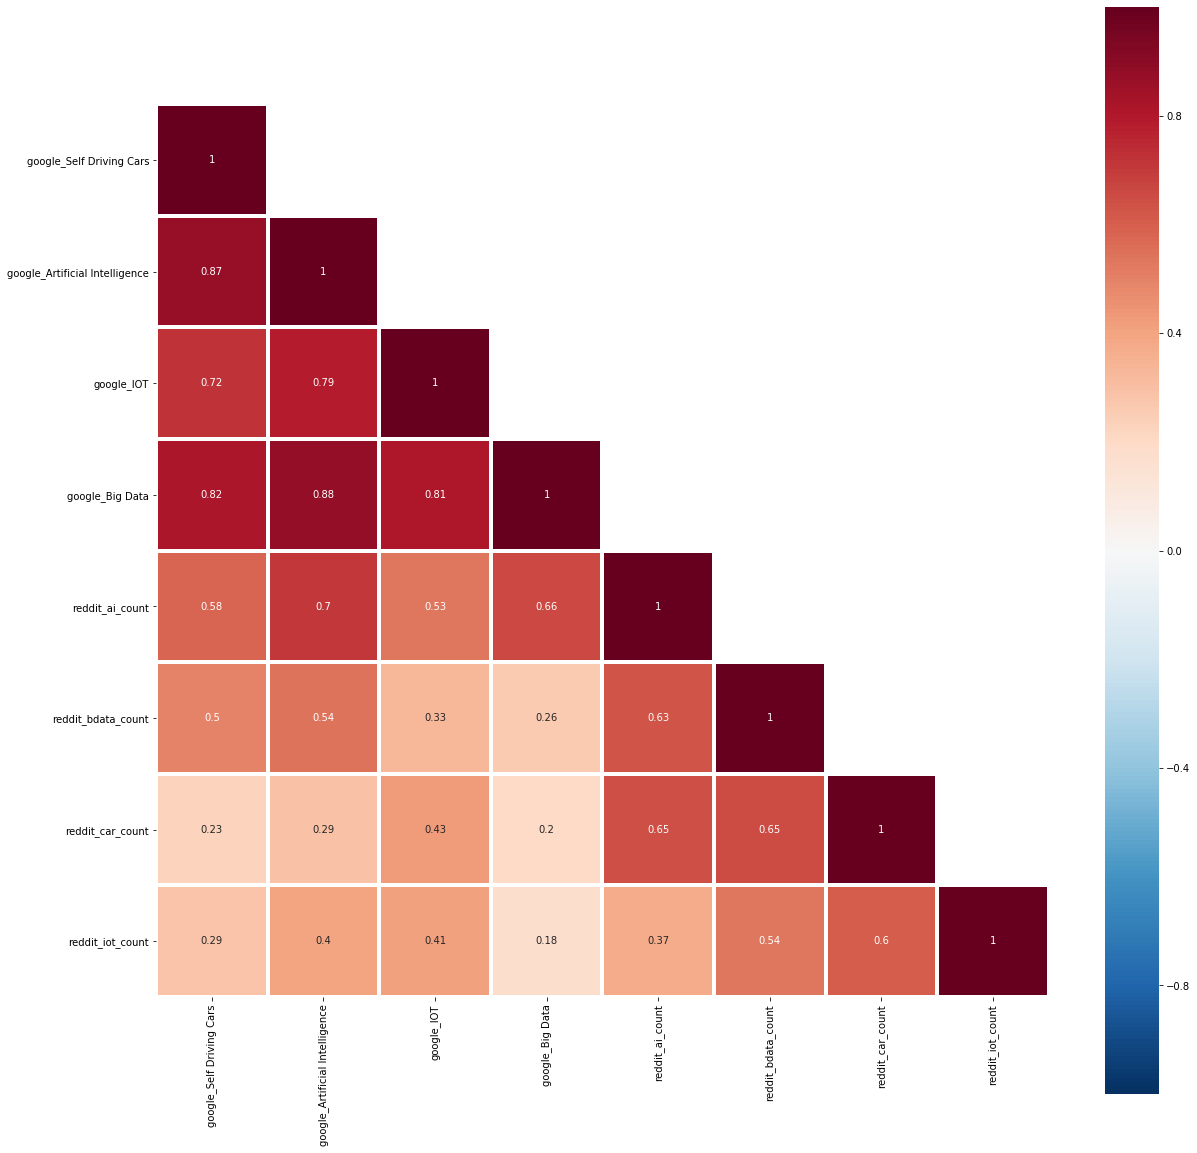

In [34]:
corr_matrix(scaled_weekly_df[full_correl_columns], length=20, width=20)

#### Unique Author Daily Analysis

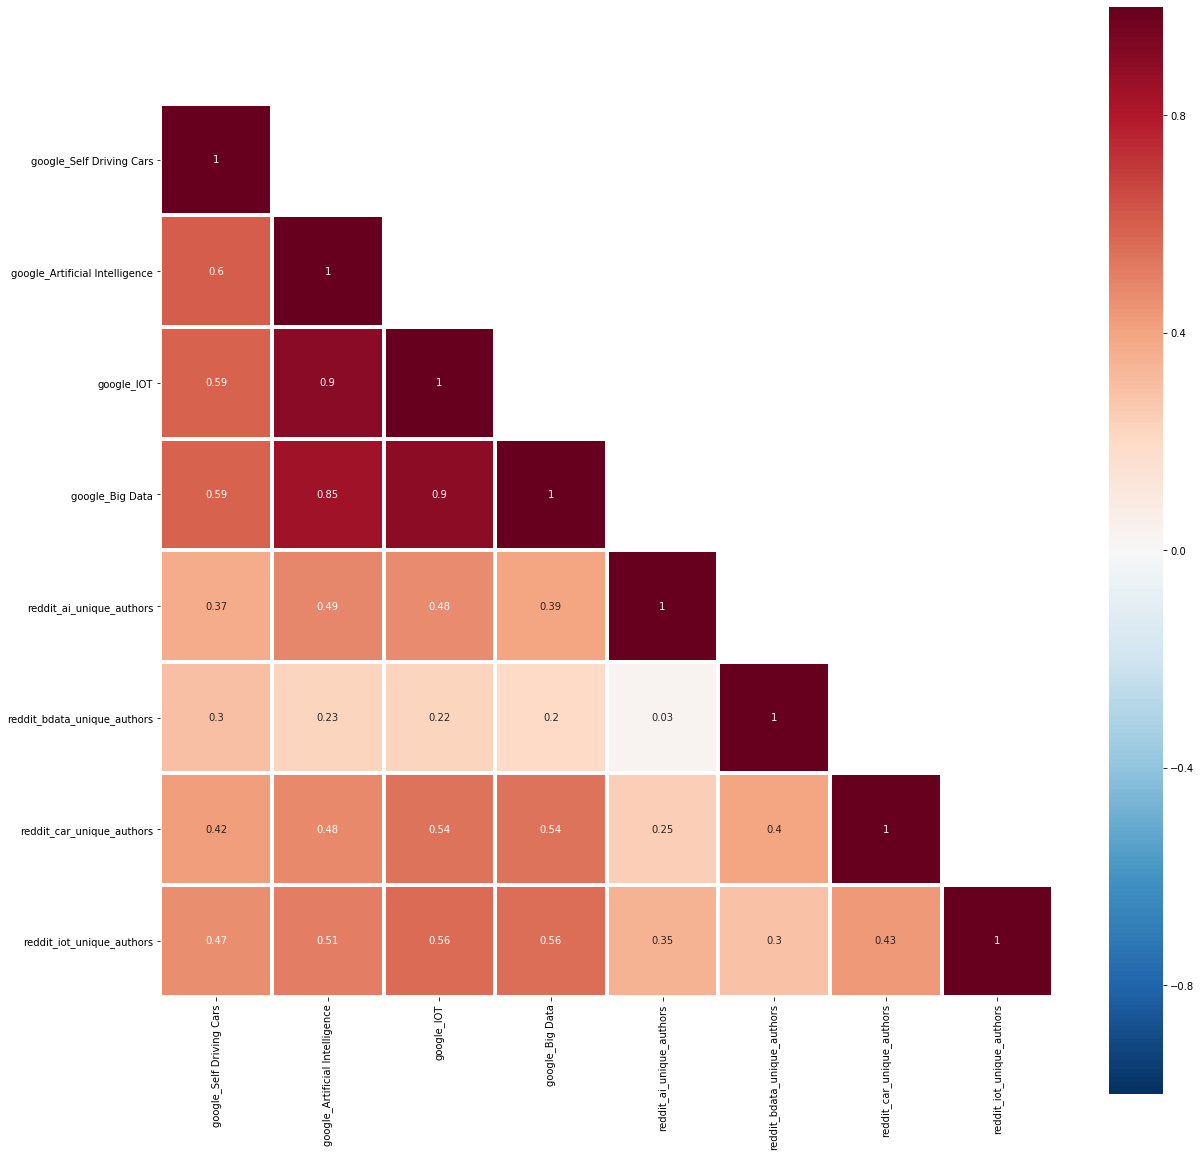

In [35]:
full_correl_columns = [col for col in scaled_daily_df.columns
                       if ('google' in col or 'unique_author' in col)]

corr_matrix(scaled_daily_df[full_correl_columns], length=20, width=20)

#### Unique Author Weekly Analysis

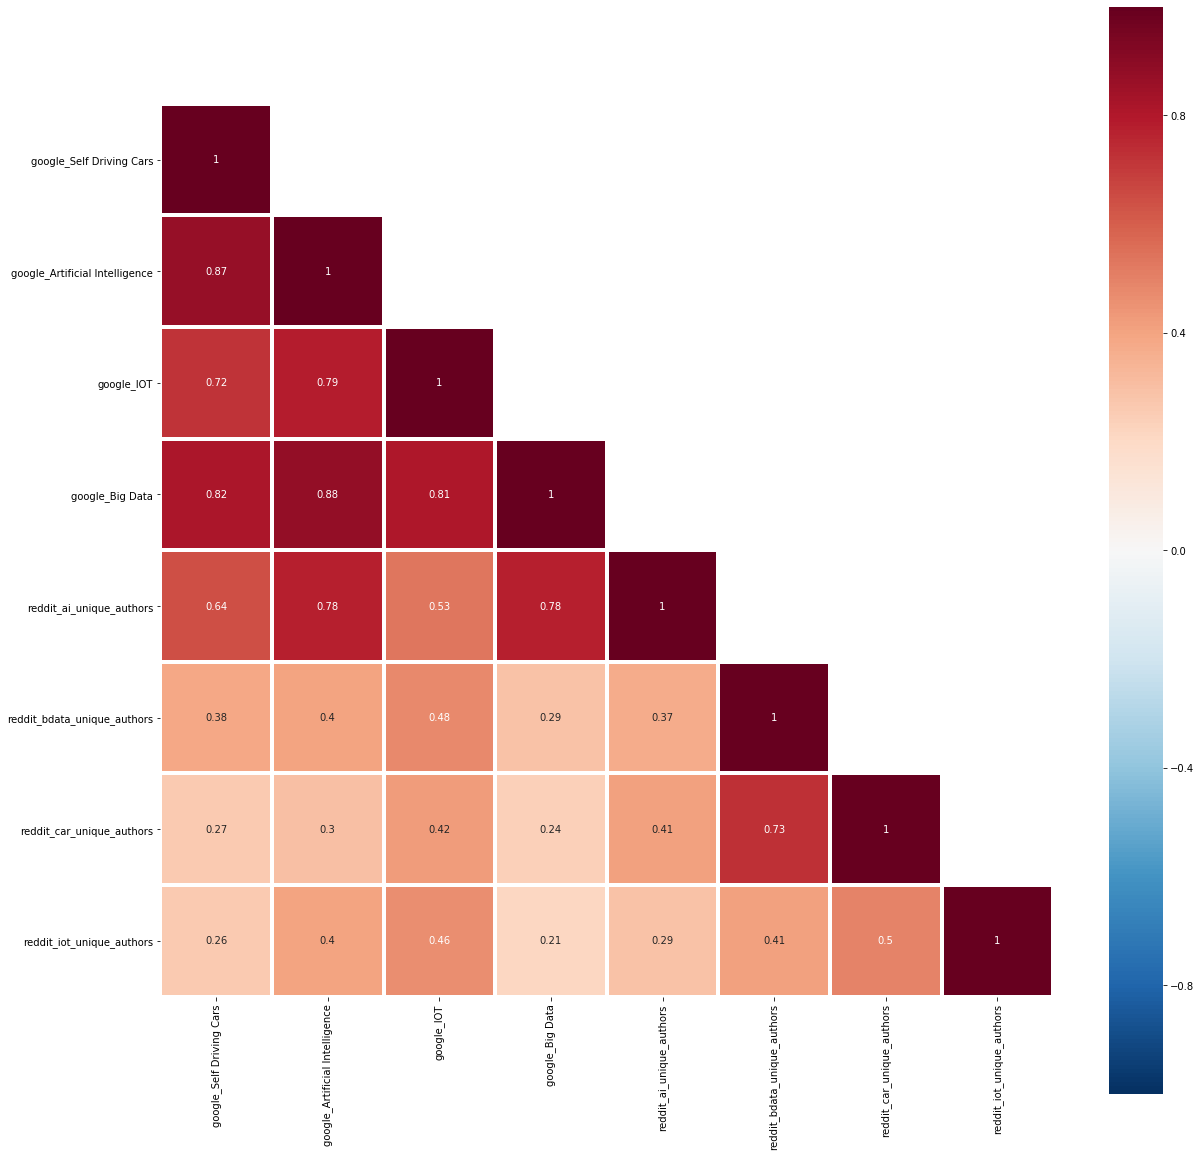

In [36]:
corr_matrix(scaled_weekly_df[full_correl_columns], length=20, width=20)